# Project 2

Joby John

### 2-node network

The Facebook-like Forum Network was attained from the same online community as the online social network; however, the focus in this network is not on the private messages exchanged among users, but on users’ activity in the forum. The forum represents an interesting two-mode network among 899 users and 522 topics in that a weight can be assigned to the ties based on the number of messages or characters that a user posted to a topic.

In [1]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import math
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline
import networkx.algorithms.bipartite as bipartite


In [2]:
# Entering data as nodes and edges
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


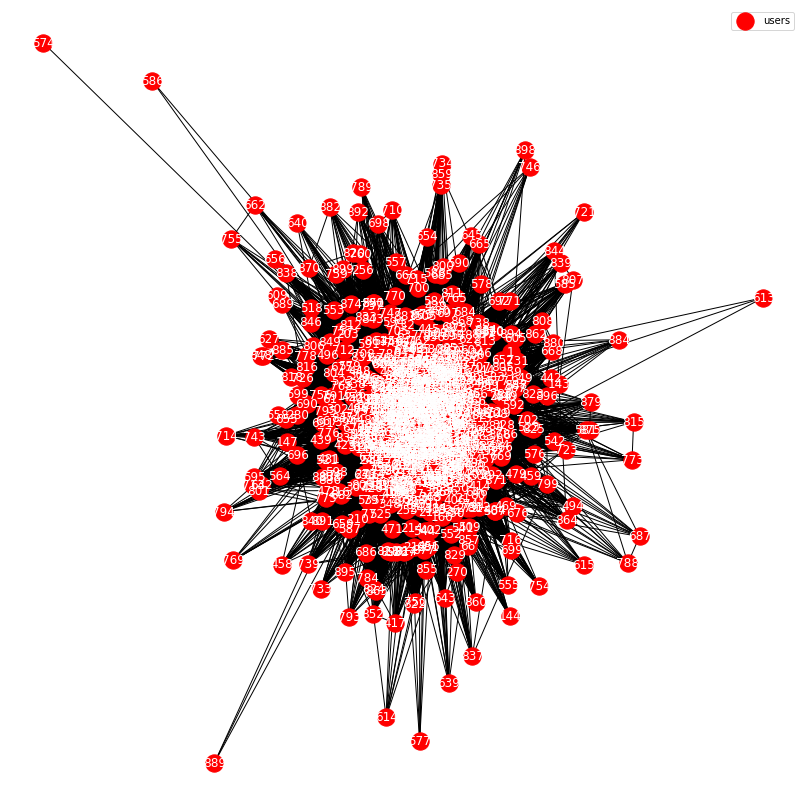

In [3]:
# Subgraph of users
plt.figure(figsize=(11,11))
user_net = bi.weighted_projected_graph(fb_g, users, ratio=False)
user_net = max(net.connected_component_subgraphs(user_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in user_net.edges(data=True)]

net.draw_spring(user_net, label = 'user_net', node_color='r', with_labels=True, node_size =300, font_color ='w')
plt.legend(["users"])
plt.show()

In [4]:
len(user_net)

899

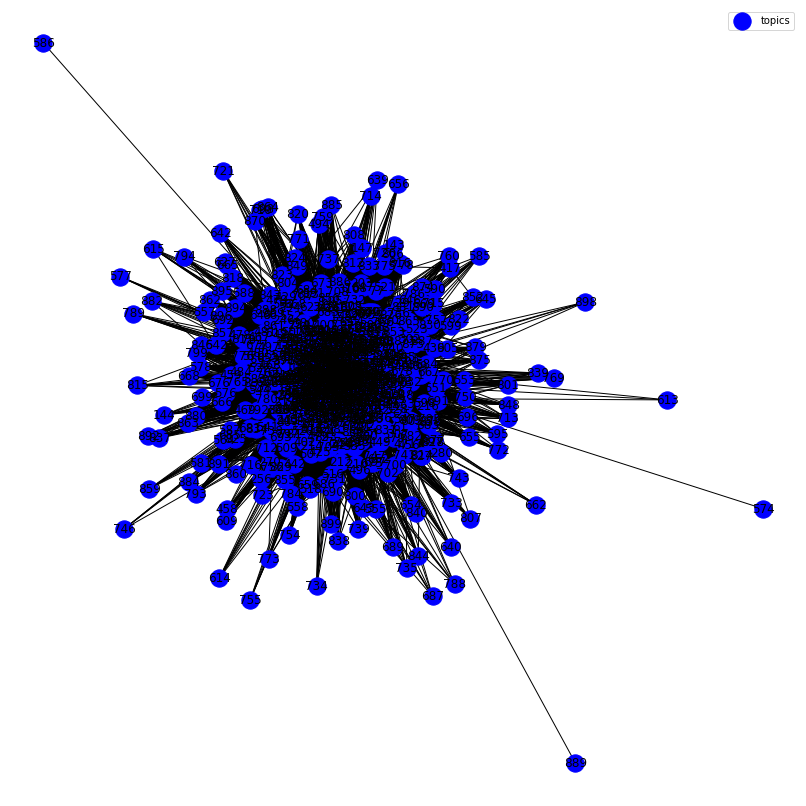

In [5]:
# Subgraph of topics
plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net = max(net.connected_component_subgraphs(topic_net),key=len)
weights = [math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]

net.draw_spring(topic_net, label = 'topic_net', node_color='b',with_labels=True,node_size =300,font_color ='k')
plt.legend(["topics"])
plt.show()

In [6]:
len(topic_net)

899

Below plot display weigth distribution. Based on the plot below we see that the distribution is right skewed with most of the values between 0 and 5.

(array([6.5078e+04, 2.4613e+04, 0.0000e+00, 1.6012e+04, 4.3090e+03,
        1.5020e+03, 9.0200e+02, 2.1600e+02, 7.6000e+01, 1.6000e+01]),
 array([0.        , 0.36109179, 0.72218358, 1.08327537, 1.44436717,
        1.80545896, 2.16655075, 2.52764254, 2.88873433, 3.24982612,
        3.61091791]),
 <a list of 10 Patch objects>)

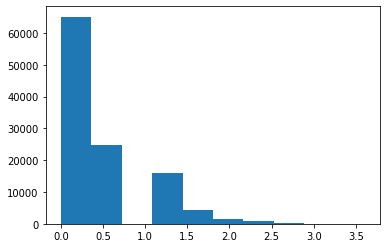

In [7]:
plt.hist(weights)

### 2. Reducing the Network

We will remove low weith nodes from users and topics graph. After trimming the network we have 685 user nodes and 684 topics nodes. 

In [8]:
# Trimming edges based on edge weight
def trim_edges(fb_g, weight=1):
    fb_g2 = net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if edata['weight']> weight:
            fb_g2.add_edge(f,to,weight=edata['weight'])
    return fb_g2

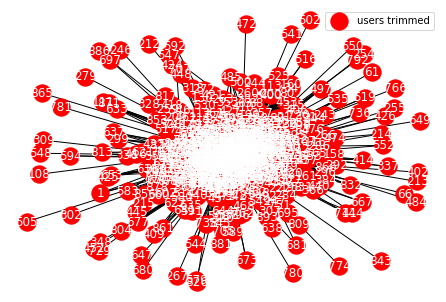

In [9]:
# Trimming the user network
usernet_trim = trim_edges(user_net,weight= math.exp(0.9))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

net.draw_spring(usernet_trim, label = 'usernet_trim', node_color='r',with_labels=True,node_size =300,font_color ='w')
plt.legend(["users trimmed"])
plt.show()

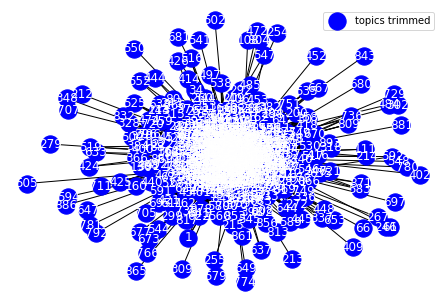

In [10]:
topicnet_trim = trim_edges(topic_net,weight= math.exp(0.9))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

net.draw_spring(topicnet_trim, label = 'topicnet_trim', node_color='b',with_labels=True,node_size =300,font_color ='w')
plt.legend(["topics trimmed"])
plt.show()

In [11]:
#function for island method
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    #print(weights)
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [12]:
cc = list(net.connected_component_subgraphs(usernet_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1


In [13]:
cc = list(net.connected_component_subgraphs(usernet_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1


In [14]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print (i, 'Weight :', islands[j][0] , 'Nodes:', len(net.nodes(islands[j][1])))

0 Weight : 3 Nodes: 585
0 Weight : 9 Nodes: 187
0 Weight : 15 Nodes: 66
0 Weight : 21 Nodes: 27
0 Weight : 27 Nodes: 14
0 Weight : 33 Nodes: 8


In [15]:
cc = list(net.connected_component_subgraphs(topicnet_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1


In [16]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print ('Subgraph:',i, 'Weight :', islands[j][0] , '# Nodes:', len(net.nodes(islands[j][1])))

Subgraph: 0 Weight : 3 # Nodes: 581
Subgraph: 0 Weight : 9 # Nodes: 186
Subgraph: 0 Weight : 15 # Nodes: 64
Subgraph: 0 Weight : 21 # Nodes: 27
Subgraph: 0 Weight : 27 # Nodes: 14
Subgraph: 0 Weight : 33 # Nodes: 8


Running Island method on both users and topics produced same subraph,  so will look at centrality measures to gain better insight about networks.

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.
Higher values of closeness indicate higher centrality.
Below table display Closeness centrality

In [17]:
clos_cen = net.closeness_centrality(usernet_trim)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
((df_close.sort_values(by='weight',ascending=False))).head()

,weight
100,0.750823
13,0.728435
67,0.723044
18,0.710280
164,0.708075


In [18]:
clos_cen = net.closeness_centrality(topicnet_trim)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
((df_close.sort_values(by='weight',ascending=False))).head()

,weight
100,0.751375
13,0.728922
67,0.723517
18,0.710718
164,0.708506


<h3>Eigen centrality Measure </h3>

Eigen centrality is a measure of the influence of a node in a network.
Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

Below table displays the Eigen centrality. People with higher value are the most influentinal. 

In [19]:

eig_cen = net.eigenvector_centrality(usernet_trim)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
(df_eig.sort_values(by='weight',ascending=False)).head()

,weight
100,0.119773
13,0.116682
18,0.115631
67,0.115011
164,0.113473


In [20]:

eig_cen = net.eigenvector_centrality(topicnet_trim)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
(df_eig.sort_values(by='weight',ascending=False)).head()

,weight
100,0.120544
13,0.118580
18,0.117348
67,0.115908
12,0.114383


<h3>Related Posts</h3>

In [21]:
c=bipartite.weighted_projected_graph(usernet_trim,topicnet_trim)
df = net.to_pandas_edgelist(c)
(df.sort_values(by='weight',ascending=False)).head()

,source,target,weight
998,100,164,362
1085,100,67,359
909,100,18,357
525,100,13,352
74673,164,67,339


<h3>Closeness Measure</h3>
Table below displays how efficently  inforation spread through the graph

In [22]:
clos_cen = net.closeness_centrality(usernet_trim)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
(df_close.sort_values(by='weight',ascending=False)).head()

,weight
100,0.750823
13,0.728435
67,0.723044
18,0.710280
164,0.708075


In [23]:
clos_cen = net.closeness_centrality(topicnet_trim)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
(df_close.sort_values(by='weight',ascending=False)).head()

,weight
100,0.751375
13,0.728922
67,0.723517
18,0.710718
164,0.708506


#### Conclusion:

In this example Island method did not produce any useful results. I am not sure if it is caused by the data or the approach taken.  We removed all the low weighted nodes from the both graphs and ran the Island method. 
Each network was determined to fit together as one Island. To determine the central nodes in each network, centrality measures were calculated and the relationship between them was calculated using different methods.  We clearly see that posts by user 100, 13, 67, 18 and 164 are the most influential and efficent at spreading information through the graph. 